In [1]:
# Homework 6 
# From Template
# Marco Barragan

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G
from scipy.signal import argrelextrema

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [3]:
def OrbitCOM(galaxy,start,end,n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    Inputs:
        galaxy, Galaxy name (string)(ex:"MW")
        start,  Initial snapshot number
        end,    Final snapshot number
        n,      Spacing between snapshots
    Returns: 
        A textfile "Orbit_galaxy.txt" that contains t,x,y,z,vx,vy,vz for each snapshot
    """
    
    # Compose the filename for output
    ﬁleout = "Orbit_" + galaxy + ".txt"
    
    # Set tolerance and VolDec for calculating COM_P in CenterOfMass
    # For M33 that is stripped more, use different values for VolDec
    delta = 0.1
    VolDec = 4
    
    # Generate the snapshot id sequence 
    # It is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end,n)
    
    # Initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids),7])
    
    for i, snap_id in enumerate(snap_ids):  # loop over files
        
        # Compose the data filename (be careful about the folder)
        # Add a string of the filenumber to "000"
        ilbl = '000' + str(snap_id)
        # Remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename = "%s_"%(galaxy) + ilbl + '.txt'

        # Initialize an instance of CenterOfMass class, using disk particles
        ptype = 2
        COM = CenterOfMass(filename,ptype)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COMP = COM.COM_P(delta,VolDec)
        COMV = COM.COM_V(COMP[0],COMP[1],COMP[2])
    
        # Store the time, pos, vel in ith element of the orbit array without units
        orbit[i] = [snap_id,COMP[0].value,COMP[1].value,COMP[2].value,COMV[0].value,COMV[1].value,COMV[2].value]
        
        # Print snap_id to see the progress
        print(snap_id)
        
    # Write the data to a file
    # We do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [4]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
MW = OrbitCOM("MW",0,801,5)
M31 = OrbitCOM("M31",0,801,5)
M33 = OrbitCOM("M33",0,801,5)

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495


In [5]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
MWorbit = np.genfromtxt('Orbit_MW.txt')
M31orbit = np.genfromtxt('Orbit_M31.txt')
M33orbit = np.genfromtxt('Orbit_M33.txt')

In [6]:
# Function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def Magnitude(vec1,vec2):
    # Inputs:
    #    two vectors (mxn arrays) 
    # Returns:
    #    The absolute value of the difference of the input vectors (mxn array)
    
    diff = vec1 - vec2
    
    return abs(diff)

In [7]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
MWvsM31 = Magnitude(MWorbit,M31orbit)
R_M31 = np.sqrt(MWvsM31[:,1]**2 + MWvsM31[:,2]**2 + MWvsM31[:,3]**2)
V_M31 = np.sqrt(MWvsM31[:,4]**2 + MWvsM31[:,5]**2 + MWvsM31[:,6]**2)
# of M33 and M31
M33vsM31 = Magnitude(M33orbit,M31orbit)
R_M33 = np.sqrt(M33vsM31[:,1]**2 + M33vsM31[:,2]**2 + M33vsM31[:,3]**2)
V_M33 = np.sqrt(M33vsM31[:,4]**2 + M33vsM31[:,5]**2 + M33vsM31[:,6]**2)

In [8]:
t = np.arange(0,801,5) * 15000 / 1e6 #12Myr / 800 snap = 15000 yr/snap

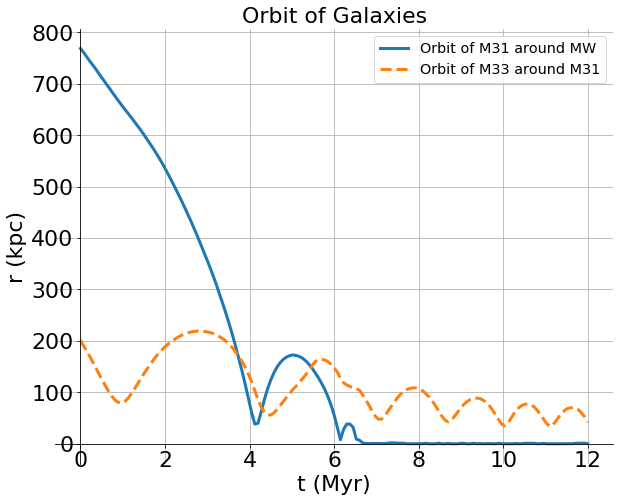

In [9]:
# Plot the Orbit of the galaxies 
#################################

fig,ax = plt.subplots(figsize=(10,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 
plt.plot(t, R_M31, linewidth=3, label='Orbit of M31 around MW')
plt.plot(t, R_M33, '--', linewidth=3, label='Orbit of M33 around M31')

# Set a grid
ax.grid(True, which='both')

# Set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

# Axes labels 
plt.title('Orbit of Galaxies',fontsize=22)
plt.xlabel('t (Myr)',fontsize=22) 
plt.ylabel('r (kpc)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

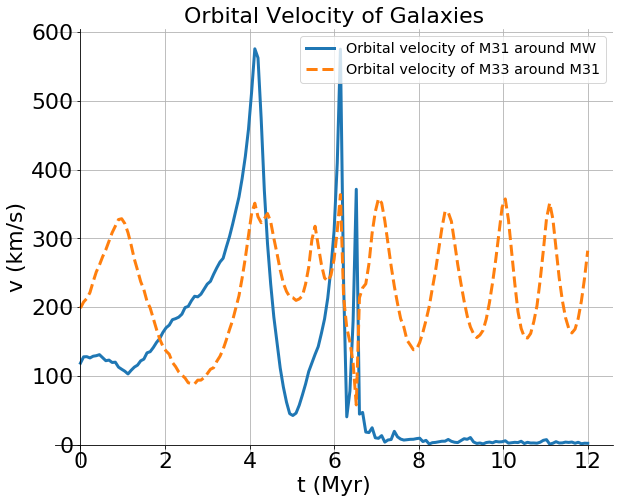

In [10]:
# Plot the orbital velocities of the galaxies 
#################################

fig,ax = plt.subplots(figsize=(10,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 
plt.plot(t, V_M31, linewidth=3, label='Orbital velocity of M31 around MW')
plt.plot(t, V_M33, '--', linewidth=3, label='Orbital velocity of M33 around M31')

# Set a grid
ax.grid(True, which='both')

# Set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')

# Turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()

# Set the y-spine
ax.spines['bottom'].set_position('zero')

# Turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

# Axes labels 
plt.title('Orbital Velocity of Galaxies',fontsize=22)
plt.xlabel('t (Myr)',fontsize=22) 
plt.ylabel('v (km/s)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

# Questions



1.) How many close encounters will the MW and M31 experience in the future?

    The Orbit graph above indicates that M31 has two minima in its orbital radius about MW before settling around zero         (collision). So there are two close calls being predicted.

2.) How is the time evolution of the separation and relative velocity related?

    Since this has to do with rotational motion, the radius and velocity are sinusoidal. And accordingly, we see that where the radius plot has maxima, the velocity plot has minima (which is expected when considering that both are sinusoidal). 

3.) When do M31 and the MW merge? (you might need to zoom in on the plot - try a log y axis). What happens to M33’s orbit when they merge?

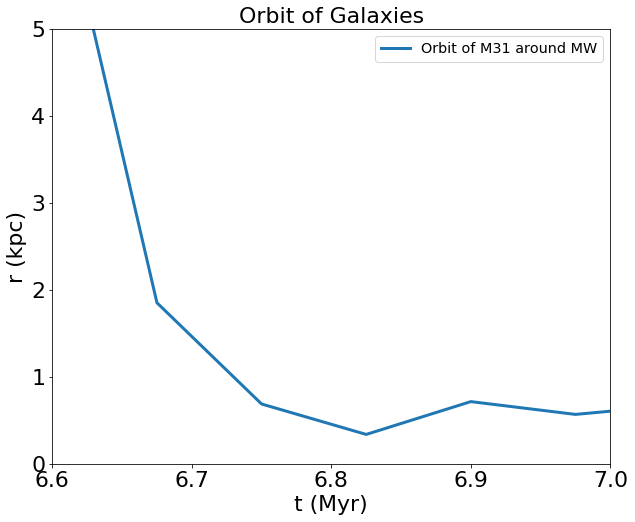

In [11]:
# Zoom in on the plot of M31's orbit 
#################################

fig,ax = plt.subplots(figsize=(10,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 
plt.plot(t, R_M31, linewidth=3, label='Orbit of M31 around MW')

# Zoom in to our guess as to where M31 and MW collide
ax.set_xlim(6.6,7)
ax.set_ylim(0,5)

# Axes labels 
plt.title('Orbit of Galaxies',fontsize=22)
plt.xlabel('t (Myr)',fontsize=22) 
plt.ylabel('r (kpc)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

     From the above graph, we can determine that M31 merges entirely with MW around ~6.83 Myr. When we look at M33's orbit around this time we can see that there is some sort of preturbation in its sinusoidal nature. The radius does not go to a local minima, but instead flattens out and decays accordingly (almost like it was readjusting itself). 

4.) BONUS: what is roughly the decay rate of M33’s orbit after 6 Gyr (ratio of the diﬀerence between two successive apocenters and the orbital period; you don’t need to be precise). If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75 kpc?

In [12]:
# Find local maxima of M33's radius
MaxIndex = argrelextrema(R_M33, np.greater)
R33Max = R_M33[MaxIndex]
tMax = t[MaxIndex]

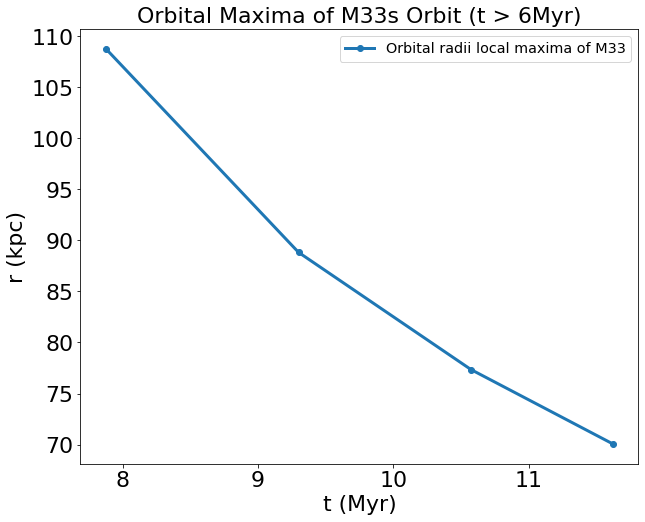

In [13]:
# Plot the decay of M33's orbit
#################################

fig,ax = plt.subplots(figsize=(10,8))

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot  beyond 6Myr (which is indices > 1)
plt.plot(tMax[2:], R33Max[2:],'-o',linewidth=3, label='Orbital radii local maxima of M33')

# Axes labels 
plt.title('Orbital Maxima of M33s Orbit (t > 6Myr)',fontsize=22)
plt.xlabel('t (Myr)',fontsize=22) 
plt.ylabel('r (kpc)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

In [14]:
# Determine decay rate (assuming linear and continuous)

# Simply by taking start and end point
OverallDecayRate = (R33Max[5] - R33Max[2]) / (tMax[5] - tMax[2]) * u.kpc / u.Myr

# Average between each points
DecayRate1 = (R33Max[3] - R33Max[2]) / (tMax[3] - tMax[2])
DecayRate2 = (R33Max[4] - R33Max[3]) / (tMax[4] - tMax[3])
DecayRate3 = (R33Max[5] - R33Max[4]) / (tMax[5] - tMax[4])
AvgDecayRate = (DecayRate1 + DecayRate2 + DecayRate3) / 3 * u.kpc / u.Myr

In [15]:
# Assuming R_M33=75kpc we will use both decay rates to find out when M33 will merge 
RInitial = 75 * u.kpc
RFinal = 0 * u.kpc

tMerge1 = (RFinal-RInitial) / OverallDecayRate
print(tMerge1)

tMerge2 = (RFinal-RInitial) / AvgDecayRate
print(tMerge2)

7.260188629426969 Myr
7.509699801408077 Myr
